<a href="https://colab.research.google.com/github/P4RTH4-ROY/Clustering-Flowers-Using-Unsupervised-Learning/blob/main/Clustering_Flowers_Using_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1: Load & Preprocess Images
import os
import cv2
import numpy as np

img_dir = "/content/drive/MyDrive/Dataset for Colab/flowers"
data = []

for category in os.listdir(img_dir):
    category_path = os.path.join(img_dir, category)
    for img_file in os.listdir(category_path):
        img_path = os.path.join(category_path, img_file)
        image = cv2.imread(img_path)
        if image is not None:
            image = cv2.resize(image, (150, 150))
            data.append(image)

data = np.array(data)
data_flat = data.reshape(len(data), -1)  # Flatten images
print("Data shape:", data_flat.shape)

Data shape: (4317, 67500)


In [ ]:
#Feature Scaling and Dimensionality Reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_flat)

pca = PCA(n_components=50)
data_pca = pca.fit_transform(data_scaled)
print("PCA reduced shape:", data_pca.shape)


PCA reduced shape: (4317, 50)


In [ ]:
#Clustering with K-Means
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_pca)
clusters = kmeans.labels_

print("Cluster assignments:", clusters[:20])


Cluster assignments: [2 1 3 0 4 1 2 1 2 4 0 0 4 1 4 2 4 4 0 0]


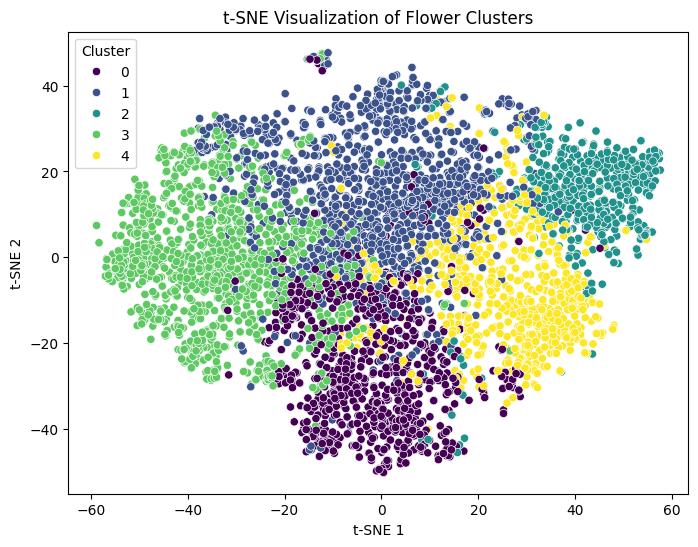

In [ ]:
#Visualizing Clusters with t-SNE
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data_pca)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], hue=clusters, palette='viridis')
plt.title("t-SNE Visualization of Flower Clusters")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title='Cluster')
plt.show()

In [ ]:
#Evaluation Using Actual Labels (Optional)
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder

# Optional: compare clustering to actual labels
labels = []
for category in os.listdir(img_dir):
    labels += [category] * len(os.listdir(os.path.join(img_dir, category)))

le = LabelEncoder()
y_true = le.fit_transform(labels)

ari = adjusted_rand_score(y_true, clusters)
print("Adjusted Rand Index (ARI):", ari)


Adjusted Rand Index (ARI): 0.03299835566709989
